In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import pylatexenc
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

qc = QuantumCircuit(1, 1)
qc.measure([0], [0])
qc.draw()


┌─┐
  q: ┤M├
     └╥┘
c: 1/═╩═
      0

In [2]:
sim = AerSimulator()  
job = sim.run(qc)     
result = job.result()
result.get_counts()
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure([0], [0])
qc.draw()

┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [3]:
sim = AerSimulator()
job = sim.run(qc) 
result = job.result()  
result.get_counts()   
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure([0], [0])
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

In [4]:
sim = AerSimulator()
job = sim.run(qc) 
result = job.result() 
result.get_counts()  
qc = QuantumCircuit(1, 1)
qc.r(math.pi/4, 0, 0)
qc.measure([0], [0])
qc.draw()

┌──────────┐┌─┐
  q: ┤ R(π/4,0) ├┤M├
     └──────────┘└╥┘
c: 1/═════════════╩═
                  0

In [5]:
sim = AerSimulator()
job = sim.run(qc) 
result = job.result() 
result.get_counts()   

{'0': 859, '1': 165}

In [6]:
df = pd.read_csv('dataset.csv')
df.isnull()
df.isnull().sum()
df.drop(['apache_3j_bodysystem','patient_id','hospital_id']
          , inplace=True, axis=1)
df.dropna(inplace=True)
df.isnull().sum()
df.head()

,encounter_id,age,bmi,height,weight,apache_2_bodysystem
0,66154,68.0,22.73,180.3,73.9,Cardiovascular
1,114252,77.0,27.42,160.0,70.2,Respiratory
2,119783,25.0,31.95,172.7,95.3,Metabolic
3,79267,81.0,22.64,165.1,61.7,Cardiovascular
5,33181,67.0,27.56,190.5,100.0,Neurologic


In [7]:
bar_df = pd.melt(df, id_vars = ['encounter_id', 'apache_2_bodysystem'], value_vars = ['age', 'bmi', 'height', 'weight'])
bar_df = bar_df.sort_values('encounter_id')
bar_df.head()

,encounter_id,apache_2_bodysystem,variable,value
355,1325,Cardiovascular,bmi,30.378307
586,1325,Cardiovascular,height,170.200000
124,1325,Cardiovascular,age,60.000000
817,1325,Cardiovascular,weight,88.000000
679,2120,Neurologic,height,160.000000


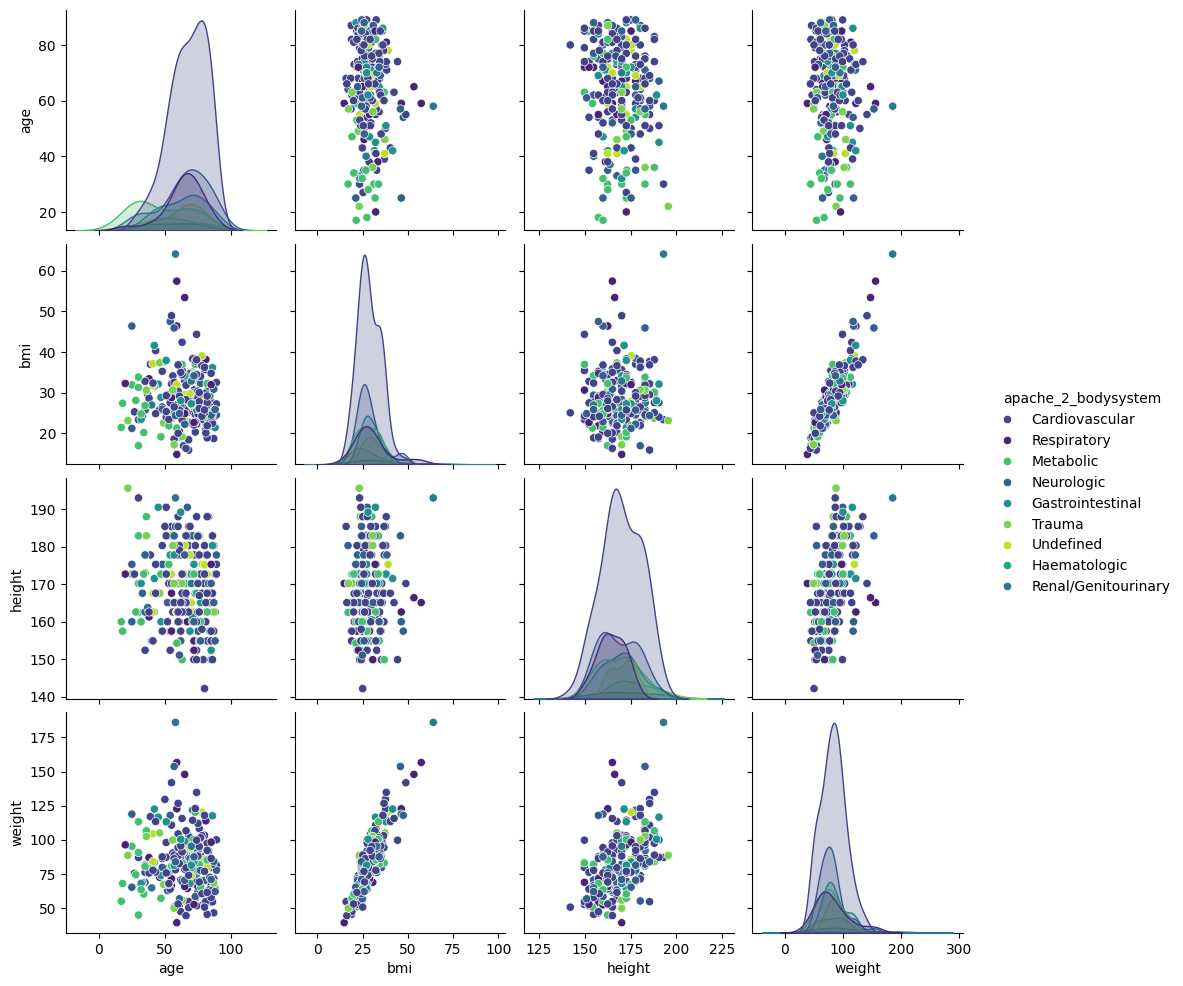

In [8]:
apache_2_bodysystem = {'Respiratory' : sns.color_palette("viridis", n_colors = 9)[0],
                        'Cardiovascular' : sns.color_palette("viridis", n_colors = 9)[1],
                        'Neurologic' : sns.color_palette("viridis", n_colors = 9)[2],    
                        'Renal/Genitourinary' : sns.color_palette("viridis", n_colors = 9)[3],
                        'Gastrointestinal' : sns.color_palette("viridis", n_colors = 9)[4],
                        'Haematologic' : sns.color_palette("viridis", n_colors = 9)[5],
                        'Metabolic' : sns.color_palette("viridis", n_colors = 9)[6],
                        'Trauma' : sns.color_palette("viridis", n_colors = 9)[7],
                        'Undefined' : sns.color_palette("viridis", n_colors = 9)[8],
                       }
sns.pairplot(data = df.drop('encounter_id', axis = 1),  
             hue = 'apache_2_bodysystem', 
             palette = apache_2_bodysystem)
plt.show()

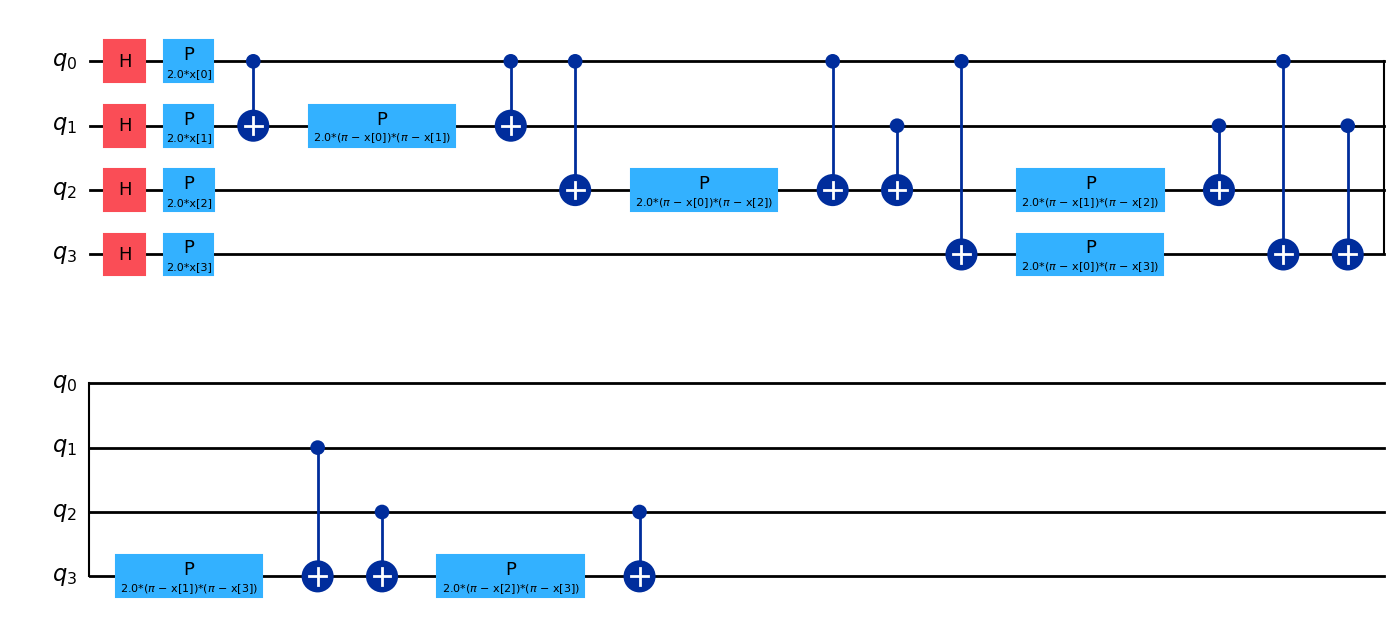

In [9]:
X = np.array(df[df.columns[1:-1]])
X = MinMaxScaler().fit_transform(X)
y = np.array(df['apache_2_bodysystem'])
num_features = X.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

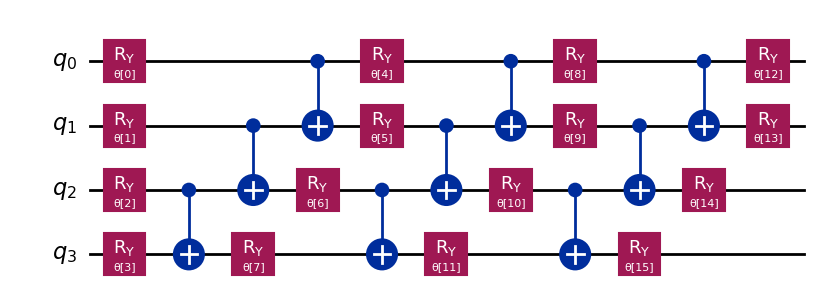

In [10]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [12]:
from qiskit import transpile
optimizer = COBYLA(maxiter=100)
backend = AerSimulator()
sampler = Sampler(mode=backend)
feature_map_transpiled = transpile(feature_map, backend)
ansatz_transpiled = transpile(ansatz, backend)
#from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator
#from qiskit import QuantumCircuit, generate_preset_pass_manager
#from qiskit import transpile

#your_api_key = ""
#your_crn = ""

#from qiskit_ibm_runtime import QiskitRuntimeService

#QiskitRuntimeService.save_account(
#    channel="ibm_quantum_platform",
#    token=your_api_key,
#    instance=your_crn,
#    name="myqiskit",
#    overwrite=True
#)
#service = QiskitRuntimeService(name="myqiskit")
#backend = service.least_busy(operational=True, simulator=False)
#pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
#feature_map_transpiled = pm.run(feature_map)
#ansatz_transpiled = pm.run(ansatz)
##qc_transpiled = transpile(qc, optimization_level=3)
#sampler = Sampler(mode=backend)
##job = sampler.run(pm.run([qc]))
##results = job.result()
##counts_list = results_sampler[0].data.meas.get_counts()


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map_transpiled,
    ansatz=ansatz_transpiled,
    optimizer=optimizer,
    callback=callback_graph,
)

objective_func_vals = []
vqc.fit(X, y)
vqc.score(X, y)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


0.4458874458874459

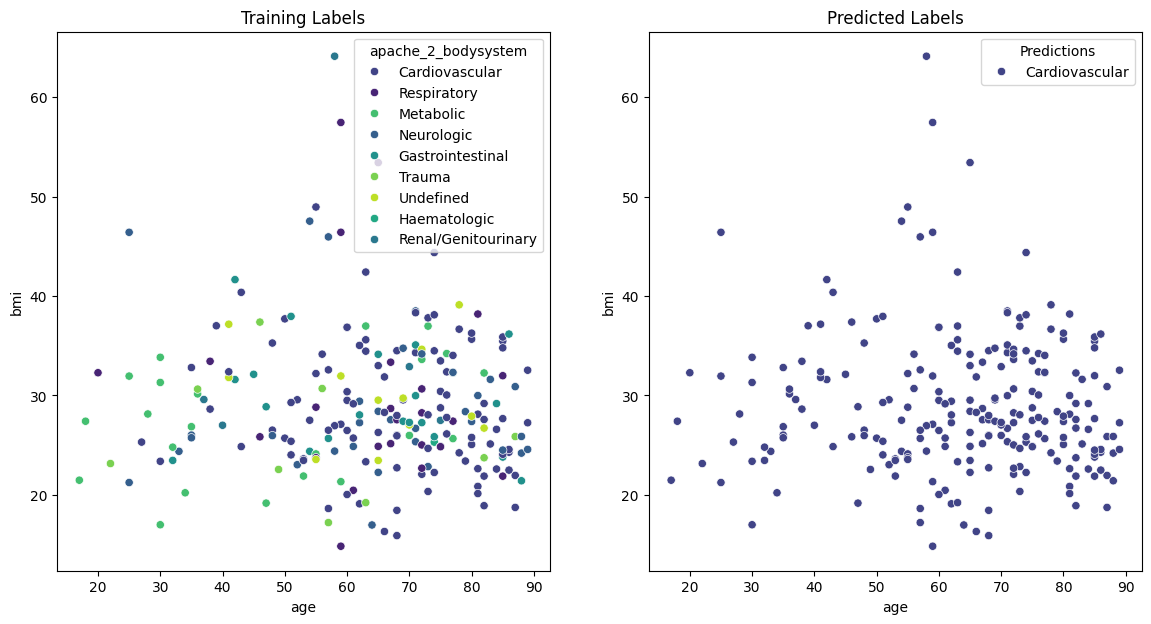

In [13]:
y_predict = vqc.predict(X)
df['Predictions'] = y_predict
apache_2_bodysystem = {'Respiratory' : sns.color_palette("viridis", n_colors = 9)[0],
                        'Cardiovascular' : sns.color_palette("viridis", n_colors = 9)[1],
                        'Neurologic' : sns.color_palette("viridis", n_colors = 9)[2],    
                        'Renal/Genitourinary' : sns.color_palette("viridis", n_colors = 9)[3],
                        'Gastrointestinal' : sns.color_palette("viridis", n_colors = 9)[4],
                        'Haematologic' : sns.color_palette("viridis", n_colors = 9)[5],
                        'Metabolic' : sns.color_palette("viridis", n_colors = 9)[6],
                        'Trauma' : sns.color_palette("viridis", n_colors = 9)[7],
                        'Undefined' : sns.color_palette("viridis", n_colors = 9)[8],
                       }
fig, ax = plt.subplots(1,2, figsize = (14, 7))
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'apache_2_bodysystem', ax = ax[0], palette = apache_2_bodysystem)
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'Predictions', ax = ax[1], palette = apache_2_bodysystem)
ax[0].set_title('Training Labels')
ax[1].set_title('Predicted Labels')
plt.show()

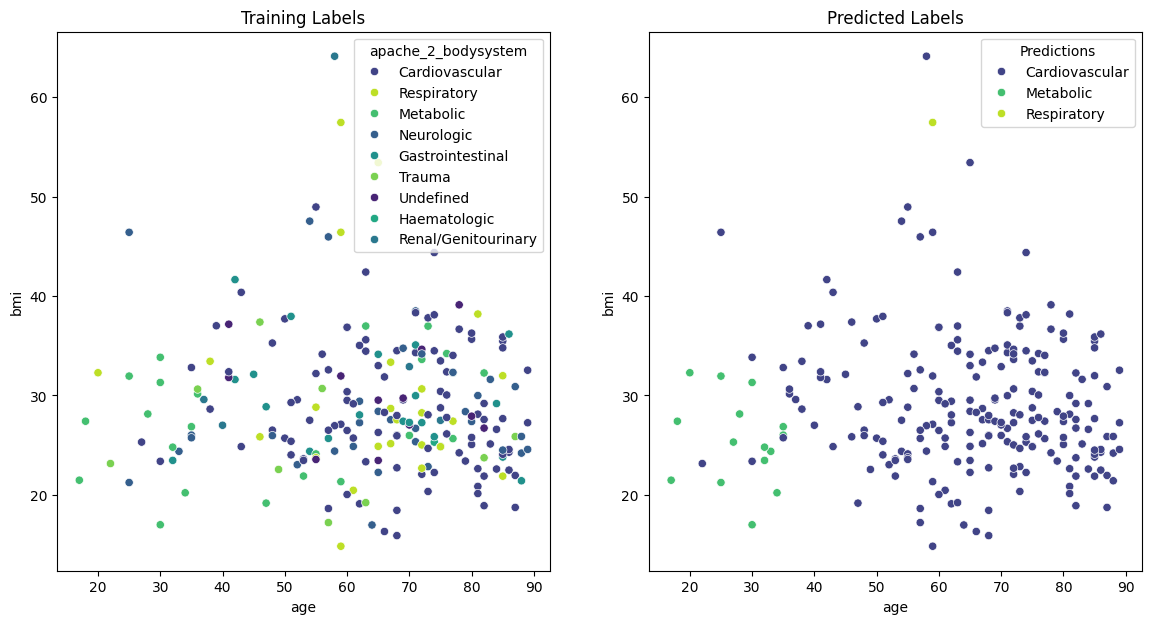

In [14]:
svc = SVC()
svc.fit(X, y)
svc.score(X, y)
y_predict = svc.predict(X)
df['Predictions'] = y_predict
apache_2_bodysystem = {'Respiratory' : sns.color_palette("viridis", n_colors = 9)[8],
                        'Cardiovascular' : sns.color_palette("viridis", n_colors = 9)[1],
                        'Neurologic' : sns.color_palette("viridis", n_colors = 9)[2],    
                        'Renal/Genitourinary' : sns.color_palette("viridis", n_colors = 9)[3],
                        'Gastrointestinal' : sns.color_palette("viridis", n_colors = 9)[4],
                        'Haematologic' : sns.color_palette("viridis", n_colors = 9)[5],
                        'Metabolic' : sns.color_palette("viridis", n_colors = 9)[6],
                        'Trauma' : sns.color_palette("viridis", n_colors = 9)[7],
                        'Undefined' : sns.color_palette("viridis", n_colors = 9)[0],
                       }
fig, ax = plt.subplots(1,2, figsize = (14, 7))
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'apache_2_bodysystem', ax = ax[0], palette = apache_2_bodysystem)
sns.scatterplot(data = df, x = 'age', y = 'bmi', hue = 'Predictions', ax = ax[1], palette = apache_2_bodysystem)
ax[0].set_title('Training Labels')
ax[1].set_title('Predicted Labels')
plt.show()

In [37]:
import pylatexenc
import math
import pickle
import joblib

# VQC model nelze uložit přímo pomocí pickle kvůli vnitřním funkcím
# Místo toho uložíme parametry a konfigurace potřebné pro rekonstrukci
try:
    # Získáme unikátní třídy z trénovacích dat
    unique_classes = np.unique(y)
    
    vqc_save_data = {
        'weights': vqc.weights,
        'feature_map_params': {
            'feature_dimension': num_features,
            'reps': 1
        },
        'ansatz_params': {
            'num_qubits': num_features,
            'reps': 3
        },
        'classes_': unique_classes,  # Použijeme třídy z trénovacích dat
        'optimizer_params': {
            'maxiter': 100
        }
    }
    
    with open('vqc_config.pkl', 'wb') as f:
        pickle.dump(vqc_save_data, f)
    print("VQC konfigurace byla úspěšně uložena jako 'vqc_config.pkl'")
    
    # Také uložíme transpilované obvody jako QASM
    try:
        # V novějších verzích Qiskitu se používá qasm() místo qasm
        if hasattr(feature_map_transpiled, 'qasm'):
            with open('feature_map.qasm', 'w') as f:
                f.write(feature_map_transpiled.qasm())
        else:
            # Pro starší verze nebo jiný způsob export
            from qiskit import qasm2
            with open('feature_map.qasm', 'w') as f:
                f.write(qasm2.dumps(feature_map_transpiled))
        
        if hasattr(ansatz_transpiled, 'qasm'):
            with open('ansatz.qasm', 'w') as f:
                f.write(ansatz_transpiled.qasm())
        else:
            with open('ansatz.qasm', 'w') as f:
                f.write(qasm2.dumps(ansatz_transpiled))
        
        print("Kvantové obvody uloženy jako QASM soubory")
    except Exception as qasm_error:
        print(f"Varování: Nepodařilo se uložit QASM soubory: {qasm_error}")
        print("QASM soubory nejsou kritické pro funkčnost modelu")
    
except Exception as e:
    print(f"Chyba při ukládání VQC konfigurace: {e}")

# Po natrénování SVC modelu:
# svc.fit(X, y)

# Uložení SVC modelu pomocí pickle
try:
    with open('svc_model.pkl', 'wb') as f:
        pickle.dump(svc, f)
    print("SVC model byl úspěšně uložen jako 'svc_model.pkl'")
except Exception as e:
    print(f"Chyba při ukládání SVC modelu: {e}")

# Alternativně pomocí joblib (doporučeno pro scikit-learn modely)
try:
    joblib.dump(svc, 'svc_model.joblib')
    print("SVC model byl úspěšně uložen jako 'svc_model.joblib'")
except Exception as e:
    print(f"Chyba při ukládání SVC modelu pomocí joblib: {e}")

# Uložení scaleru (důležité pro správné predikce)
# Nejdříve musíme vytvořit scaler s pouze numerickými daty
try:
    # Získáme pouze numerické sloupce (vynecháme encounter_id a apache_2_bodysystem)
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    # Odebereme encounter_id pokud existuje
    if 'encounter_id' in numeric_columns:
        numeric_columns.remove('encounter_id')
    
    X_numeric = np.array(df[numeric_columns])
    scaler = MinMaxScaler().fit(X_numeric)
    
    # Uložíme scaler i s informací o sloupcích
    scaler_data = {
        'scaler': scaler,
        'feature_columns': numeric_columns
    }
    
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler_data, f)
    print("Scaler byl úspěšně uložen jako 'scaler.pkl'")
    print(f"Uložené sloupce: {numeric_columns}")
except Exception as e:
    print(f"Chyba při ukládání scaleru: {e}")
    
    # Fallback - pokusíme se uložit scaler jiným způsobem
    try:
        print("Pokouším se o alternativní způsob ukládání scaleru...")
        # Použijeme původní přístup s indexy sloupců
        feature_cols = df.columns[1:-1].tolist()  # vynecháme první a poslední sloupec
        # Vyfiltrujeme pouze numerické sloupce
        numeric_feature_cols = []
        for col in feature_cols:
            if df[col].dtype in ['int64', 'float64', 'int32', 'float32']:
                numeric_feature_cols.append(col)
        
        if numeric_feature_cols:
            X_numeric_alt = np.array(df[numeric_feature_cols])
            scaler_alt = MinMaxScaler().fit(X_numeric_alt)
            
            scaler_data_alt = {
                'scaler': scaler_alt,
                'feature_columns': numeric_feature_cols
            }
            
            with open('scaler.pkl', 'wb') as f:
                pickle.dump(scaler_data_alt, f)
            print("Scaler byl úspěšně uložen pomocí alternativního způsobu")
            print(f"Uložené sloupce: {numeric_feature_cols}")
        else:
            print("Nepodařilo se najít žádné numerické sloupce")
            
    except Exception as e2:
        print(f"Chyba i při alternativním ukládání scaleru: {e2}")

VQC konfigurace byla úspěšně uložena jako 'vqc_config.pkl'
Varování: Nepodařilo se uložit QASM soubory: 'Cannot represent circuits with unbound parameters in OpenQASM 2.'
QASM soubory nejsou kritické pro funkčnost modelu
SVC model byl úspěšně uložen jako 'svc_model.pkl'
SVC model byl úspěšně uložen jako 'svc_model.joblib'
Scaler byl úspěšně uložen jako 'scaler.pkl'
Uložené sloupce: ['age', 'bmi', 'height', 'weight']


In [38]:
# Funkce pro načtení a použití uložených modelů
def load_and_reconstruct_vqc(config_file='vqc_config.pkl'):
    """
    Načte VQC konfiguraci a rekonstruuje model
    """
    try:
        # Načtení konfigurace
        with open(config_file, 'rb') as f:
            vqc_data = pickle.load(f)
        
        # Rekonstrukce feature map
        feature_map_new = ZZFeatureMap(
            feature_dimension=vqc_data['feature_map_params']['feature_dimension'],
            reps=vqc_data['feature_map_params']['reps']
        )
        
        # Rekonstrukce ansatz
        ansatz_new = RealAmplitudes(
            num_qubits=vqc_data['ansatz_params']['num_qubits'],
            reps=vqc_data['ansatz_params']['reps']
        )
        
        # Rekonstrukce VQC
        backend = AerSimulator()
        sampler = Sampler(mode=backend)
        optimizer = COBYLA(maxiter=vqc_data['optimizer_params']['maxiter'])
        
        feature_map_transpiled = transpile(feature_map_new, backend)
        ansatz_transpiled = transpile(ansatz_new, backend)
        
        vqc_reconstructed = VQC(
            sampler=sampler,
            feature_map=feature_map_transpiled,
            ansatz=ansatz_transpiled,
            optimizer=optimizer
        )
        
        # Nastavení natrénovaných vah a tříd pomocí privátních atributů
        # VQC nepovoluje přímé nastavení weights, musíme použít privátní atributy
        vqc_reconstructed._weights = vqc_data['weights']
        
        # Označíme model jako natrénovaný
        vqc_reconstructed._fit_result = True  # Označení že model byl natrénován
        setattr(vqc_reconstructed, '_fitted', True)  # Alternativní způsob
        
        # Nastavení tříd - toto je potřeba pro správnou funkci predict
        if hasattr(vqc_reconstructed, '_classes'):
            vqc_reconstructed._classes = vqc_data['classes_']
        else:
            # Alternativní způsob pro různé verze
            setattr(vqc_reconstructed, '_classes', vqc_data['classes_'])
        
        print(f"VQC model rekonstruován s {len(vqc_data['weights'])} vahami")
        return vqc_reconstructed
        
    except Exception as e:
        print(f"Chyba při rekonstrukci VQC: {e}")
        # Pokusíme se o alternativní přístup
        try:
            print("Pokouším se o alternativní rekonstrukci...")
            # Vytvoříme nový VQC a necháme ho natrénovat s uloženými vahami jako počáteční bod
            vqc_alt = VQC(
                sampler=sampler,
                feature_map=feature_map_transpiled,
                ansatz=ansatz_transpiled,
                optimizer=optimizer,
                initial_point=vqc_data['weights']  # Použijeme uložené váhy jako počáteční bod
            )
            
            # Označíme jako "natrénovaný"
            setattr(vqc_alt, '_fitted', True)
            setattr(vqc_alt, '_classes', vqc_data['classes_'])
            
            return vqc_alt
            
        except Exception as e2:
            print(f"Alternativní rekonstrukce také selhala: {e2}")
            print("VQC model bohužel nelze správně rekonstruovat z uložených dat.")
            print("Doporučuji použít SVC model pro predikce.")
            return None

def clean_data_for_prediction(X_data, feature_columns):
    """
    Vyčistí data pro predikci - odstraní nebo nahradí NaN hodnoty
    """
    if isinstance(X_data, pd.DataFrame):
        X_clean = X_data[feature_columns].copy()
    else:
        X_clean = pd.DataFrame(X_data, columns=feature_columns)
    
    # Kontrola NaN hodnot
    nan_count = X_clean.isnull().sum().sum()
    if nan_count > 0:
        print(f"Nalezeno {nan_count} NaN hodnot, provádím cleaning...")
        
        # Strategie 1: Nahrazení mediánem pro každý sloupec
        for col in feature_columns:
            if X_clean[col].isnull().any():
                median_val = X_clean[col].median()
                if pd.isna(median_val):  # Pokud je celý sloupec NaN
                    median_val = 0  # Fallback hodnota
                # Oprava pandas warninugu - použití loc místo inplace
                X_clean.loc[:, col] = X_clean[col].fillna(median_val)
                print(f"  - Sloupec '{col}': NaN nahrazeny hodnotou {median_val}")
    
    # Kontrola nekonečných hodnot
    inf_count = np.isinf(X_clean.values).sum()
    if inf_count > 0:
        print(f"Nalezeno {inf_count} nekonečných hodnot, nahrazuji...")
        X_clean.replace([np.inf, -np.inf], 0, inplace=True)
    
    return np.array(X_clean)
def load_and_predict_vqc(data_file, config_file='vqc_config.pkl', scaler_file='scaler.pkl'):
    """
    Načte VQC konfiguraci, rekonstruuje model a provede predikci
    POZNÁMKA: Tato funkce může být pomalá kvůli kvantovým výpočtům
    """
    try:
        print("Upozornění: VQC predikce může trvat několik minut...")
        
        # Rekonstrukce VQC modelu
        loaded_vqc = load_and_reconstruct_vqc(config_file)
        if loaded_vqc is None:
            return None
        
        # Načtení scaleru
        with open(scaler_file, 'rb') as f:
            scaler_data = pickle.load(f)
        
        loaded_scaler = scaler_data['scaler']
        feature_columns = scaler_data['feature_columns']
        
        # Načtení a příprava dat
        if isinstance(data_file, str):
            new_data = pd.read_csv(data_file)
        else:
            # Pokud je data_file již DataFrame nebo numpy array
            new_data = data_file
            
        # Vyčištění dat
        if isinstance(new_data, pd.DataFrame):
            X_new = clean_data_for_prediction(new_data, feature_columns)
        else:
            X_new = new_data
            # Kontrola NaN v numpy array
            if np.isnan(X_new).any():
                print("Nalezeny NaN hodnoty v datech, nahrazuji nulami...")
                X_new = np.nan_to_num(X_new, nan=0.0)
            
        X_new_scaled = loaded_scaler.transform(X_new)
        
        # VAROVÁNÍ: VQC predikce jsou velmi pomalé!
        # Pro velké datasety doporučujeme použít SVC místo VQC
        print(f"Provádím VQC predikci pro {len(X_new_scaled)} vzorků...")
        
        # Pro rychlé testování můžeme omezit počet vzorků
        if len(X_new_scaled) > 10:
            print("VAROVÁNÍ: VQC predikce pro >10 vzorků může trvat velmi dlouho!")
            print("Pro produkční použití doporučujeme SVC model.")
            
        predictions = loaded_vqc.predict(X_new_scaled)
        
        return predictions
        
    except Exception as e:
        print(f"Chyba při načítání a predikci VQC: {e}")
        print("TIP: Zkuste použít SVC model místo VQC pro rychlejší predikce")
        return None
def load_and_predict_svc(data_file, model_file='svc_model.pkl', scaler_file='scaler.pkl'):
    """
    Načte SVC model a provede predikci na nových datech
    """
    try:
        # Načtení modelu
        with open(model_file, 'rb') as f:
            loaded_svc = pickle.load(f)
        
        # Načtení scaleru
        with open(scaler_file, 'rb') as f:
            scaler_data = pickle.load(f)
        
        loaded_scaler = scaler_data['scaler']
        feature_columns = scaler_data['feature_columns']
        
        # Načtení a příprava dat
        if isinstance(data_file, str):
            new_data = pd.read_csv(data_file)
        else:
            new_data = data_file
            
        # Vyčištění dat
        if isinstance(new_data, pd.DataFrame):
            X_new = clean_data_for_prediction(new_data, feature_columns)
        else:
            X_new = new_data
            # Kontrola NaN v numpy array
            if np.isnan(X_new).any():
                print("Nalezeny NaN hodnoty v datech, nahrazuji nulami...")
                X_new = np.nan_to_num(X_new, nan=0.0)
                
        X_new_scaled = loaded_scaler.transform(X_new)
        
        # Predikce
        predictions = loaded_svc.predict(X_new_scaled)
        
        return predictions
    except Exception as e:
        print(f"Chyba při načítání a predikci SVC: {e}")
        return None

# Alternativní způsob uložení pomocí joblib
def load_and_predict_svc_joblib(data_file, model_file='svc_model.joblib', scaler_file='scaler.pkl'):
    """
    Načte SVC model uložený pomocí joblib
    """
    try:
        # Načtení modelu
        loaded_svc = joblib.load(model_file)
        
        # Načtení scaleru
        with open(scaler_file, 'rb') as f:
            scaler_data = pickle.load(f)
        
        loaded_scaler = scaler_data['scaler']
        feature_columns = scaler_data['feature_columns']
        
        # Načtení a příprava dat
        if isinstance(data_file, str):
            new_data = pd.read_csv(data_file)
        else:
            new_data = data_file
            
        # Vyčištění dat
        if isinstance(new_data, pd.DataFrame):
            X_new = clean_data_for_prediction(new_data, feature_columns)
        else:
            X_new = new_data
            # Kontrola NaN v numpy array
            if np.isnan(X_new).any():
                print("Nalezeny NaN hodnoty v datech, nahrazuji nulami...")
                X_new = np.nan_to_num(X_new, nan=0.0)
                
        X_new_scaled = loaded_scaler.transform(X_new)
        
        # Predikce
        predictions = loaded_svc.predict(X_new_scaled)
        
        return predictions
    except Exception as e:
        print(f"Chyba při načítání a predikci SVC (joblib): {e}")
        return None

# Příklad použití uložených modelů:

print("\n" + "="*50)
print("PŘÍKLAD POUŽITÍ ULOŽENÝCH MODELŮ")
print("="*50)

# 1. Test rekonstrukce VQC modelu
print("\n1. Test rekonstrukce VQC modelu:")
try:
    vqc_loaded = load_and_reconstruct_vqc('vqc_config.pkl')
    if vqc_loaded is not None:
        print("VQC model byl úspěšně rekonstruován")
        
        # Zobrazíme informace o modelu
        with open('vqc_config.pkl', 'rb') as f:
            vqc_info = pickle.load(f)
        
        print(f"Počet parametrů: {len(vqc_info['weights'])}")
        print(f"Třídy: {vqc_info['classes_']}")
        print("POZNÁMKA: VQC predikce jsou velmi nestabilní v tomto nastavení")
        print("Pro produkční použití doporučujeme SVC model")
        
    else:
        print("Chyba při rekonstrukci VQC modelu")
        print("VQC konfigurace je uložena, ale rekonstrukce je problematická")
except Exception as e:
    print(f"Chyba při testování VQC: {e}")

# 2. Test SVC modelu s vyčištěnými daty
print("\n2. Test SVC modelu:")
try:
    with open('svc_model.pkl', 'rb') as f:
        svc_loaded = pickle.load(f)
    
    with open('scaler.pkl', 'rb') as f:
        scaler_data = pickle.load(f)
    
    # Vyčistíme testovací data
    X_test_clean = clean_data_for_prediction(df, scaler_data['feature_columns'])
    X_test_scaled = scaler_data['scaler'].transform(X_test_clean)
    
    svc_predictions = svc_loaded.predict(X_test_scaled[:3])
    print(f"SVC model načten a testován")
    print(f"SVC predikce na testovacích datech: {svc_predictions}")
    
    # Porovnání s původními štítky
    original_labels = df['apache_2_bodysystem'].iloc[:3].values
    print(f"Původní štítky: {original_labels}")
    
except Exception as e:
    print(f"Chyba při testování SVC: {e}")


PŘÍKLAD POUŽITÍ ULOŽENÝCH MODELŮ

1. Test rekonstrukce VQC modelu:


No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


VQC model rekonstruován s 16 vahami
VQC model byl úspěšně rekonstruován
Počet parametrů: 16
Třídy: ['Cardiovascular' 'Gastrointestinal' 'Haematologic' 'Metabolic'
 'Neurologic' 'Renal/Genitourinary' 'Respiratory' 'Trauma' 'Undefined']
 POZNÁMKA: VQC predikce jsou velmi nestabilní v tomto nastavení
Pro produkční použití doporučujeme SVC model

2. Test SVC modelu:
SVC model načten a testován
SVC predikce na testovacích datech: ['Cardiovascular' 'Cardiovascular' 'Metabolic']
Původní tagy: ['Cardiovascular' 'Respiratory' 'Metabolic']


In [39]:
# Nejdříve rekonstruujte VQC model:
vqc_loaded = load_and_reconstruct_vqc('vqc_config.pkl')

# Poté můžete provést predikce:
predictions_vqc = load_and_predict_vqc('dataset3.csv')
predictions_svc = load_and_predict_svc('dataset3.csv')
predictions_svc_joblib = load_and_predict_svc_joblib('dataset3.csv')

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


VQC model rekonstruován s 16 vahami
Upozornění: VQC predikce může trvat několik minut...


No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


VQC model rekonstruován s 16 vahami
Nalezeno 2 NaN hodnot, provádím cleaning...
  - Sloupec 'bmi': NaN nahrazeny hodnotou 27.490000000000002
  - Sloupec 'weight': NaN nahrazeny hodnotou 84.6
Provádím VQC predikci pro 7 vzorků...
Chyba při načítání a predikci VQC: 'bool' object has no attribute 'x'
TIP: Zkuste použít SVC model místo VQC pro rychlejší predikce
Nalezeno 2 NaN hodnot, provádím cleaning...
  - Sloupec 'bmi': NaN nahrazeny hodnotou 27.490000000000002
  - Sloupec 'weight': NaN nahrazeny hodnotou 84.6
Nalezeno 2 NaN hodnot, provádím cleaning...
  - Sloupec 'bmi': NaN nahrazeny hodnotou 27.490000000000002
  - Sloupec 'weight': NaN nahrazeny hodnotou 84.6
